#**Handling Missing Data**

Kita akan menggunakan dataset titanic pada notebook ini.

In [ ]:
# Impor library yang akan digunakan
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# Ambil datasetnya
!wget https://cloudstorage.dadangnh.com/bahan-ajar/bootcamp/titanic.csv
data = pd.read_csv('titanic.csv')

--2021-06-03 07:29:59--  https://cloudstorage.dadangnh.com/bahan-ajar/bootcamp/titanic.csv
Resolving cloudstorage.dadangnh.com (cloudstorage.dadangnh.com)... 104.21.5.21, 172.67.132.193, 2606:4700:3035::ac43:84c1, ...
Connecting to cloudstorage.dadangnh.com (cloudstorage.dadangnh.com)|104.21.5.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118062 (115K) [application/octet-stream]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>] 115.29K  --.-KB/s    in 0.02s   

2021-06-03 07:29:59 (4.58 MB/s) - ‘titanic.csv’ saved [118062/118062]



In [ ]:
# Membaca bentuk dataset
data.shape

(1309, 14)

In [ ]:
data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [ ]:
# Membaca tipe kolom
data.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [ ]:
# Mendiskripsikan dataset
data.describe

<bound method NDFrame.describe of       pclass  survived  ...   body                        home.dest
0          1         1  ...    NaN                     St Louis, MO
1          1         1  ...    NaN  Montreal, PQ / Chesterville, ON
2          1         0  ...    NaN  Montreal, PQ / Chesterville, ON
3          1         0  ...  135.0  Montreal, PQ / Chesterville, ON
4          1         0  ...    NaN  Montreal, PQ / Chesterville, ON
...      ...       ...  ...    ...                              ...
1304       3         0  ...  328.0                              NaN
1305       3         0  ...    NaN                              NaN
1306       3         0  ...  304.0                              NaN
1307       3         0  ...    NaN                              NaN
1308       3         0  ...    NaN                              NaN

[1309 rows x 14 columns]>

In [ ]:
# Melihat sampel 5 baris teratas
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Mencari missing value

Dapat menggunakan fungsi berikut:

** info()**
* Memberi informasi total data
* Memberi informasi detail terkait tipe data, 'object' berarti string, tipe lainnya seperti int and float
* Juga memberi informasi terkait jumlah observasi atas data 'non-null' pada setiap kolom

** describe() **By default akan menampilkan tabel informasi dalam bentuk angka, yang terdiri dari:
* Statistik deskriptif
* jumlah data 'non-null' yang di observasi
* dengan parameter "include='all'" akan menampilkan seluruh kolom dan parameter "include=['O']" akan menyertakan object

**.isnull().sum()***
* akan menampilkan jumlah dari *missing value* dari setiap kolom

In [ ]:
# Menampilkan informasi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [ ]:
# Menampilkan informasi dataset dengan fungsi describe()
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [ ]:
# Menampilkan informasi dataset dengan fungsi describe() dan include object
data.describe(include=['O'])

,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,295,1307,486,745
unique,1307,2,929,186,3,27,369
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,2,843,11,6,914,39,64


In [ ]:
# Menampilkan informasi dataset dengan seluruh kolom
data.describe(include='all')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,27,NaN,369
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64
mean,2.294882,0.381971,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN
std,0.837836,0.486055,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN
min,1.000000,0.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN


In [ ]:
# Menampilkan data jumlah missing value pada setiap kolom
data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

Manakah yang memungkinkan untuk kita imputasi?

## Investigasi missing value pada kolom usia

Dataset Titanic pada umumnya digunakan untuk analisis prediksi. Pada dataset tersebut, terdapat relatif banyak data yang hilang pada kolom usia, apa yang perlu kita lakukan? Apakah kita hapus saja kolom tersebut, atau isi data kosong dengan data seperti ini:

usiaRataRata = np.mean(data.age)

data.age = data.age.fillna(usiaRataRata) 

### Diskusi:

* **Adakah yang salah dari metode diatas?**

* **Berapa rata-rata usia penumpang?**

* **Berapa rata-rata usia penumpang laki-laki, berapa rata-rata usia penumpang perempuan? Adakah yang dapat digali?**


In [ ]:
# Rata-rata usia seluruh penumpang
data['age'].mean()

29.881137667304014

In [ ]:
# Rata-rata usia penumpang per jenis kelamin
data.groupby('sex').agg({
    'age': ['mean', 'max', 'min']
})

age            
             mean   max   min
sex                          
female  28.687088  76.0  0.17
male    30.585228  80.0  0.33

In [ ]:
# Mari lihat lebih detail persebaran usia penumpang
data['age'].value_counts()

24.00    47
22.00    43
21.00    41
30.00    40
18.00    39
         ..
70.50     1
76.00     1
67.00     1
0.42      1
0.67      1
Name: age, Length: 98, dtype: int64

In [ ]:
# Sebagian besar penumpang masih muda, diantara 20-30 tahun. Mari lihat nilai unik dari usia-nya
data['age'].unique()

array([29.  ,  0.92,  2.  , 30.  , 25.  , 48.  , 63.  , 39.  , 53.  ,
       71.  , 47.  , 18.  , 24.  , 26.  , 80.  ,   nan, 50.  , 32.  ,
       36.  , 37.  , 42.  , 19.  , 35.  , 28.  , 45.  , 40.  , 58.  ,
       22.  , 41.  , 44.  , 59.  , 60.  , 33.  , 17.  , 11.  , 14.  ,
       49.  , 76.  , 46.  , 27.  , 64.  , 55.  , 70.  , 38.  , 51.  ,
       31.  ,  4.  , 54.  , 23.  , 43.  , 52.  , 16.  , 32.5 , 21.  ,
       15.  , 65.  , 28.5 , 45.5 , 56.  , 13.  , 61.  , 34.  ,  6.  ,
       57.  , 62.  , 67.  ,  1.  , 12.  , 20.  ,  0.83,  8.  ,  0.67,
        7.  ,  3.  , 36.5 , 18.5 ,  5.  , 66.  ,  9.  ,  0.75, 70.5 ,
       22.5 ,  0.33,  0.17, 40.5 , 10.  , 23.5 , 34.5 , 20.5 , 30.5 ,
       55.5 , 38.5 , 14.5 , 24.5 , 60.5 , 74.  ,  0.42, 11.5 , 26.5 ])

dapat dilihat bahwa nan juga masuk dalam perhitungan

### Diskusi:
*  berapa banyak nilai 'NaN' pada kolom usia?
*  berapa banyak usia  < 1?

In [ ]:
# Mari lihat data yang berisi nan pada kolom age
data[data['age'].isnull()].head() 

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
15,1,0,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY"
37,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S,9,NaN,"Los Angeles, CA"
40,1,0,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,NaN,NaN,"Philadelphia, PA"
46,1,0,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S,NaN,NaN,NaN
59,1,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0,0,17770,27.7208,NaN,C,5,NaN,"New York, NY"


In [ ]:
# Data dengan usia penumpang < 1
data[data['age'] < 1]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
359,2,1,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,13,NaN,"Bangkok, Thailand / Roseville, IL"
427,2,1,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S,4,NaN,"Detroit, MI"
548,2,1,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S,4,NaN,"Cornwall / Akron, OH"
590,2,1,"West, Miss. Barbara J",female,0.92,1,2,C.A. 34651,27.7500,NaN,S,10,NaN,"Bournmouth, England"
611,3,1,"Aks, Master. Philip Frank",male,0.83,0,1,392091,9.3500,NaN,S,11,NaN,"London, England Norfolk, VA"
657,3,1,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C,C,NaN,"Syria New York, NY"
658,3,1,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C,C,NaN,"Syria New York, NY"
747,3,0,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33,0,2,347080,14.4000,NaN,S,NaN,NaN,"Stanton, IA"
763,3,1,"Dean, Miss. Elizabeth Gladys ""Millvina""",female,0.17,1,2,C.A. 2315,20.5750,NaN,S,10,NaN,"Devon, England Wichita, KS"


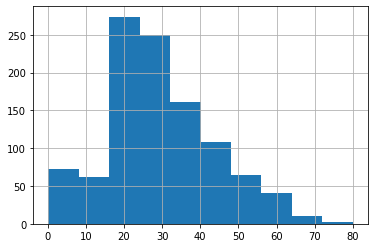

In [ ]:
%matplotlib inline
data['age'].hist()

In [ ]:
sum(data['age'].isnull())
# 263 penumpang tidak memiliki data usia

263

### Mari lihat faktor lain yang dapat menjadi clue untuk usia penumpang, seperti nama?

### Diskusi:

* Dapatkah kita asumsikan bahwa 'Mrs' berarti wanita yang telah menikah (bukan anak-anak)?

* Bagaimana dengan 'Miss' atau 'Ms'?


In [ ]:
# Buat fungsi untuk meng-ekstrak title/gelar pada nama
# Pada dataset, nama ditulis dengan format seperti:
# Allison, Master. Hudson Trevor
# Sehingga kita perlu pisahkan ','
# kemudian pisahkan '.'

def ekstrak_nama(nama):
     return nama.split(',')[1].split('.')[0].strip()

In [ ]:
# Testing esktrak nama
datasementara = pd.DataFrame({'Title':data['name'].apply(ekstrak_nama)})
# Cek nilai unik dari setiap title
datasementara['Title'].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [ ]:
# Beberapa gelar mungkin terlihat asing, akan tetapi sebagian besar merupakan gelar standar, dapat dicek dengan menghitung jumlahnya
datasementara['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Ms                2
Mlle              2
Major             2
Lady              1
Capt              1
the Countess      1
Sir               1
Don               1
Dona              1
Mme               1
Jonkheer          1
Name: Title, dtype: int64

In [ ]:
# Cross check apakah jumlah sesuai
sum(datasementara['Title'].value_counts())

1309

### Dari pemrosesan diatas, dapat diketahui bahwa seluruh penumpang memiliki title/ gelar.

Terdapat gelar 'Jonkheer' (dan Dona - Spanish?)

#### Bagaimana dengan gelar 'Master'? Bisakah diasumsikan sebagai anak-anak?

#### Dr, Rev, Col, Major, Capt, Sir, Don, apakah semuanya orang dewasa?

In [ ]:
# Buat duplikat dari dataset semula
df2 = data.copy()
df2['Title'] = data['name'].apply(ekstrak_nama)
df2.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs


In [ ]:
# Periksa bahwa data title tidak ada yang kosong
df2[df2['Title'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title


#### Lihat distribusi *missing value* dari kolom title

In [ ]:
# Cek jumlah data missing
df2[df2.age.isnull()].Title.value_counts()

Mr        176
Miss       50
Mrs        27
Master      8
Ms          1
Dr          1
Name: Title, dtype: int64

In [ ]:
# Cek untuk title Dr
df2[df2['Title'] == "Dr"]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title
40,1,0,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,NaN,NaN,"Philadelphia, PA",Dr
93,1,1,"Dodge, Dr. Washington",male,53.0,1,1,33638,81.8583,A34,S,13,NaN,"San Francisco, CA",Dr
119,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S,5,NaN,"New York, NY",Dr
181,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,8,NaN,"New York, NY",Dr
206,1,0,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,NaN,230.0,"Fond du Lac, WI",Dr
278,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C,3,NaN,"Basel, Switzerland",Dr
508,2,0,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S,NaN,NaN,"Frankfort, KY",Dr
525,2,0,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S,NaN,NaN,"Hamilton, ON",Dr


In [ ]:
# rata-rata usia Dr
df2[df2['Title'] == "Dr"]['age'].mean()

43.57142857142857

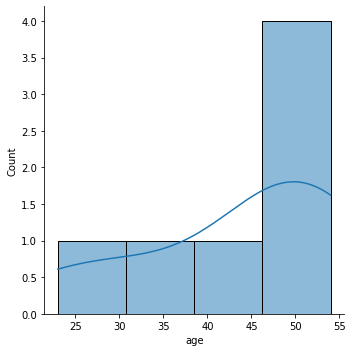

In [ ]:
sns.displot(df2[df2['Title'] == "Dr"]['age'],kde=True)

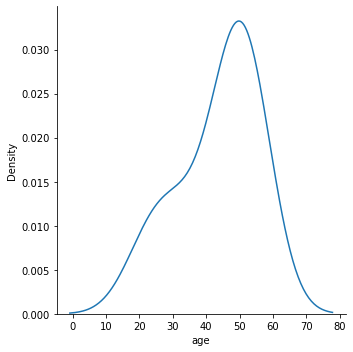

In [ ]:
sns.displot(df2[df2['Title'] == "Dr"]['age'], kind='kde')

In [ ]:
# Median
df2[df2['Title'] == "Dr"]['age'].median()

49.0

## Missing values: usia anak-anak

In [ ]:
# Seberapa banyak title master?
df2[df2['Title'] == "Master"]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master
54,1,1,"Carter, Master. William Thornton II",male,11.00,1,2,113760,120.0000,B96 B98,S,4,NaN,"Bryn Mawr, PA",Master
94,1,1,"Dodge, Master. Washington",male,4.00,0,2,33638,81.8583,A34,S,5,NaN,"San Francisco, CA",Master
249,1,1,"Ryerson, Master. John Borie",male,13.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,4,NaN,"Haverford, PA / Cooperstown, NY",Master
273,1,1,"Spedden, Master. Robert Douglas",male,6.00,0,2,16966,134.5000,E34,C,3,NaN,"Tuxedo Park, NY",Master
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,3,0,"Skoog, Master. Karl Thorsten",male,10.00,3,2,347088,27.9000,NaN,S,NaN,NaN,NaN,Master
1240,3,1,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C,16,NaN,NaN,Master
1256,3,1,"Touma, Master. Georges Youssef",male,7.00,1,1,2650,15.2458,NaN,C,C,NaN,NaN,Master
1262,3,0,"van Billiard, Master. James William",male,NaN,1,1,A/5. 851,14.5000,NaN,S,NaN,NaN,NaN,Master


In [ ]:
# Terdapat 61 data, gunakan describe()
df2[df2['Title'] == "Master"].describe()

,pclass,survived,age,sibsp,parch,fare,body
count,61.000000,61.000000,53.000000,61.000000,61.000000,61.000000,3.00000
mean,2.655738,0.508197,5.482642,2.049180,1.377049,36.008195,24.00000
std,0.629424,0.504082,4.161554,1.961515,0.552688,40.677102,37.26929
min,1.000000,0.000000,0.330000,0.000000,0.000000,3.170800,1.00000
25%,2.000000,0.000000,2.000000,1.000000,1.000000,15.245800,2.50000
50%,3.000000,1.000000,4.000000,1.000000,1.000000,26.000000,4.00000
75%,3.000000,1.000000,9.000000,4.000000,2.000000,36.750000,35.50000
max,3.000000,1.000000,14.500000,8.000000,2.000000,262.375000,67.00000


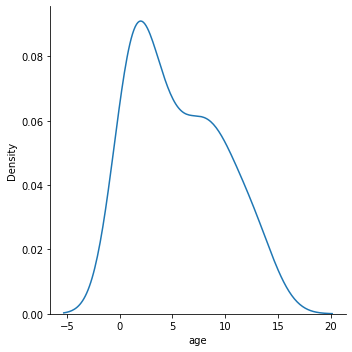

In [ ]:
sns.displot(df2[df2['Title'] == "Master"]['age'], kind='kde')

In [ ]:
# rata-rata usia anak anak
df2[df2['Title'] == "Master"]['age'].mean()

5.482641509433962

In [ ]:
# median usia anak anak
df2[df2['Title'] == "Master"]['age'].median()

4.0

### Bahan diskusi

* Seberapa banyak anak anak tidak memiliki data usia?
* Apakah terdapat faktor lain yang dapat digunakan untuk imputasi data usia?



### Data Transformasi dan Proses Imputasi



In [ ]:
# Sebelum memulai proses imputasi, perlu disimpan data indicator bahwa data awal usia ada yang miss
df2['missing_indicator'] = df2['age'].isnull()

In [ ]:
df2.head(20)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title,missing_indicator
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss,False
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master,False
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss,False
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr,False
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs,False
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",Mr,False
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",Miss,False
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",Mr,False
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",Mrs,False
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",Mr,False


In [ ]:
# Untuk transformasi, bisa dilakukan perubahan dari title yang jumlahnya minor menjadi bagian dari title berdasarkan gender laki-laki/ wanita yang umum
# df2.loc[df2.Title == 'Rev'] --> menjadi Mr 
# df2.loc[df2.Title == 'Col'] --> menjadi Mr
# df2.loc[df2.Title == 'Mlle'] --> menjadi Miss
# df2.loc[df2.Title == 'Dona'] --> menjadi Mrs
# df2.loc[df2.Title == 'Jonkheer'] --> menjadi Mr
# df2.loc[df2.Title == 'Mme'] --> menjadi Miss
# df2.loc[df2.Title == 'Don'] --> menjadi Mr
# df2.loc[df2.Title == 'the Countess'] --> menjadi Mrs
# df2.loc[df2.Title == 'Lady'] --> menjadi Mrs
df2.Title = df2.Title.replace(['Sir','Capt','Don','Col','Jonkheer','Rev','Major'], 'Mr')

df2.Title = df2.Title.replace(['Dona','the Countess','Lady'], 'Mrs')

df2.Title = df2.Title.replace(['Ms','Mlle','Mme'], 'Miss')

df2.Title.value_counts()

Mr        775
Miss      265
Mrs       200
Master     61
Dr          8
Name: Title, dtype: int64

In [ ]:
df2.age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

In [ ]:
df2.groupby('Title').agg({
    'age': ['mean', 'median', 'max', 'min']
})

age                    
             mean median   max    min
Title                                
Dr      43.571429   49.0  54.0  23.00
Master   5.482642    4.0  14.5   0.33
Miss    21.834533   22.0  63.0   0.17
Mr      32.685309   30.0  80.0  11.00
Mrs     37.046243   36.0  76.0  14.00

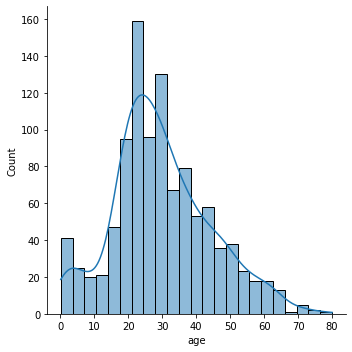

In [ ]:
sns.displot(df2['age'], kde=True)

In [ ]:
# Proses imputasi data yang hilang
df2['age'].fillna(df2.groupby('Title')['age'].transform('median'), inplace=True)
df2.age.describe()

count    1309.000000
mean       29.572704
std        13.170206
min         0.170000
25%        22.000000
50%        30.000000
75%        36.000000
max        80.000000
Name: age, dtype: float64

In [ ]:
df2.groupby('Title').agg({
    'age': ['mean', 'median', 'max', 'min']
})

age                    
             mean median   max    min
Title                                
Dr      44.250000   49.0  54.0  23.00
Master   5.288197    4.0  14.5   0.33
Miss    21.866377   22.0  63.0   0.17
Mr      32.075484   30.0  80.0  11.00
Mrs     36.905000   36.0  76.0  14.00

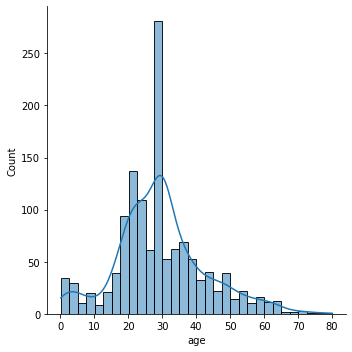

In [ ]:
sns.displot(df2['age'], kde=True)

In [ ]:
df2['age'].describe()

count    1309.000000
mean       29.572704
std        13.170206
min         0.170000
25%        22.000000
50%        30.000000
75%        36.000000
max        80.000000
Name: age, dtype: float64

In [ ]:
df2.agg({'age':['skew']})

,age
skew,0.446701


# Data Transformation

Menggunakan data fare untuk Titanic, kita dapat melihat distribusi data, apakah data tersebut terdistribusi normal atau tidak. Untuk data yang memiliki nilai *skewness* positif, kita bisa menggunakan teknik Root Transformation maupun Log Transformation, sedangkan untuk data yang memiliki nilai *skewness* negatif, kita bisa menggunakan teknik Square Transformation maupun Power/Exponent Transformation

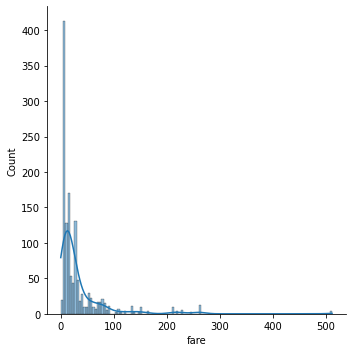

In [ ]:
## plot fare
sns.displot(df2['fare'], kde=True)

In [ ]:
## lihat nilai kemiringan
df2.agg({'fare':['skew']})

,fare
skew,4.367709


## Root Transformation


di sini kita akan mencoba untuk mentransformasi data fare menggunakan root transformasion

In [ ]:
# Python Square root transformation
df2['fare_sqrt'] = np.sqrt(df2['fare'])

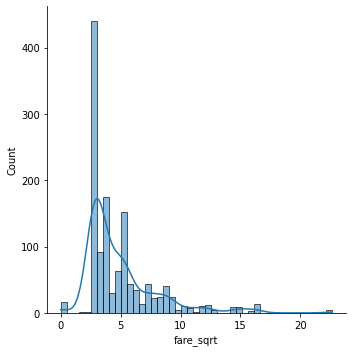

In [ ]:
## plot fare
sns.displot(df2['fare_sqrt'], kde=True)

In [ ]:
## lihat nilai kemiringan
df2.agg({'fare_sqrt':['skew']})

,fare_sqrt
skew,2.087012


## Log Transformation

disini kita akan mencoba menggunakan root transformation, perlu diingat bahwa karena kita akan menggunakan fungsi log, maka semua data yang akan ditransformasi harus bernilai positif diatas 0

In [ ]:
## cek apakah terdapat nilai dibaawah 0 untuk fare
print(df2['fare'].min())

0.0


In [ ]:
# Python log transformation
df2['fare_log'] = np.log(df2['fare']+1)

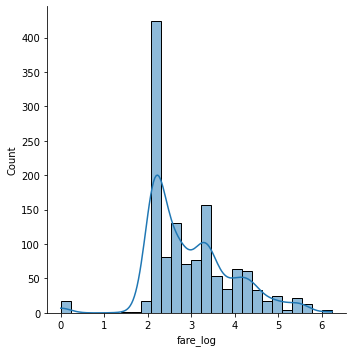

In [ ]:
## plot fare
sns.displot(df2['fare_log'], kde=True)

In [ ]:
## lihat nilai kemiringan
df2.agg({'fare_log':['skew']})

,fare_log
skew,0.541888


# Data Normalization


## Min-max Normalization

In [ ]:
df2['age_minmax'] = (df2['age']-df2['age'].min())/(df2['age'].max()-df2['age'].min())

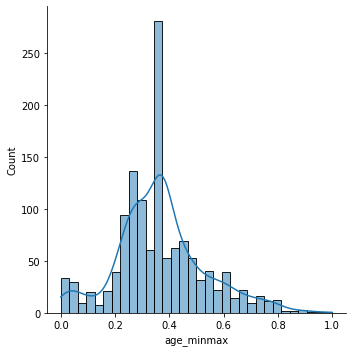

In [ ]:
## plot age minmax
sns.displot(df2['age_minmax'], kde=True)

In [ ]:
# describe age_minmax
df2['age_minmax'].describe()

count    1309.000000
mean        0.368316
std         0.164978
min         0.000000
25%         0.273456
50%         0.373669
75%         0.448829
max         1.000000
Name: age_minmax, dtype: float64

## Z-score normalization


In [ ]:
df2['age_std'] = (df2['age']-df2['age'].mean())/df2['age'].std()

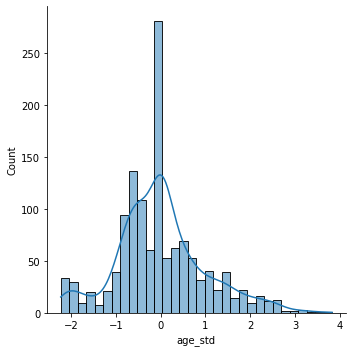

In [ ]:
## plot age minmax
sns.displot(df2['age_std'], kde=True)

In [ ]:
# describe age_std
df2['age_std'].describe()

count    1.309000e+03
mean    -4.211628e-16
std      1.000000e+00
min     -2.232517e+00
25%     -5.749875e-01
50%      3.244411e-02
75%      4.880178e-01
max      3.828892e+00
Name: age_std, dtype: float64

# Binning

## menggunakan fungsi cut()

### menggunakan fungsi linspace

fungsi ini digunakan untuk membuat array yang berisi sejumlah angka dengan jarak yang sama. Angka-angka ini yang nantinya akan digunakan sebagai batas untuk tiap kategori.

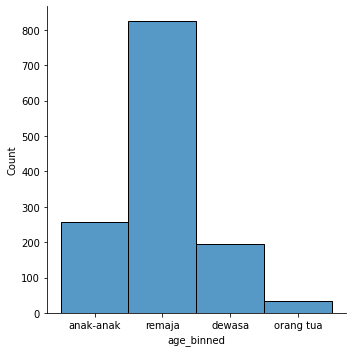

In [ ]:
## binning data usia menggunakan linspace()

bins_ls = np.linspace(min(df2['age']), max(df2['age']), 5)

cat = ['anak-anak', 'remaja', 'dewasa', 'orang tua']

df2['age_binned'] = pd.cut(df2['age'], bins=bins_ls, labels=cat, include_lowest=True)

sns.displot(df2['age_binned'])

In [ ]:
print(bins_ls)

[ 0.17   20.1275 40.085  60.0425 80.    ]


### menggunakan interval_range()

dengan menggunakan fungsi interval_range(), kita bisa menentukan besaran jarak untuk setiap batasan bins. hanya saja untuk fungsi ini, kita tidak bisa langsung memberikan label

In [ ]:
## binning data usia menggunakan interval_range()
interval_range = pd.interval_range(start=0, freq=10, end=80)

df2['age_binned2'] = pd.cut(df2['age'], bins=interval_range, include_lowest=True)


In [ ]:
df2.groupby('age_binned2').agg({
    'age': ['mean', 'min', 'max']
})

age             
                  mean    min   max
age_binned2                        
(0, 10]       4.278404   0.17  10.0
(10, 20]     17.283951  11.00  20.0
(20, 30]     26.435374  20.50  30.0
(30, 40]     35.221519  30.50  40.0
(40, 50]     45.394737  40.50  50.0
(50, 60]     55.185484  51.00  60.0
(60, 70]     63.537037  60.50  70.0
(70, 80]     73.750000  70.50  80.0

In [ ]:
df2['age_binned2'] = df2['age_binned2'].apply(lambda x: x.mid)

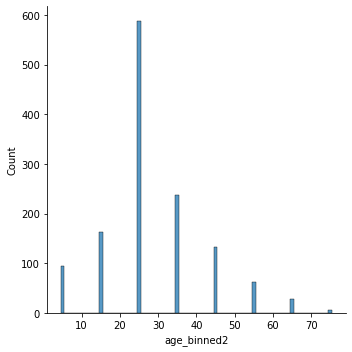

In [ ]:
sns.displot(df2['age_binned2'])

### menggunakan batasan khusus (custom)

kita bisa menggunakan metode ini jika batasan yang kita punya memiliki kriteria khusus

In [ ]:
## binning data usia menggunakan batasan custom
cat = ['anak-anak', 'remaja', 'dewasa', 'orang tua']

bins = [0,12,20,40,80]

df2['age_binned'] = pd.cut(df2['age'], bins=bins, labels=cat, include_lowest=True)


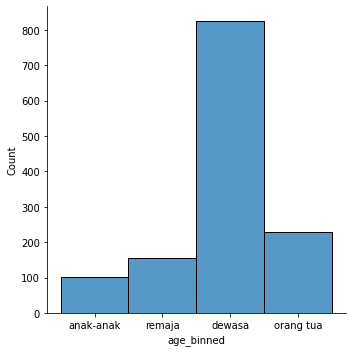

In [ ]:
sns.displot(df2['age_binned'])

## menggunakan qcut()

Selain fungsi cut(), ada juga fungsi qcut() yang dapat digunakan untuk melakukan binning data. Menurut dokumentasi pandas, qcut digambarkan sebagai Quantile-based discretization function. Singkatnya fungsi qcut() ini akan membagi data ke dalam jumlah yang sama. Karena itu, jarak untuk masing-masing bin boleh jadi berbeda satu sama lain.

In [ ]:
## binning data usia menggunakan qcut()
cat = ['1', '2', '3', '4']

df2['age_binned_q'] = pd.qcut(df2['age'], q=4, labels=cat)


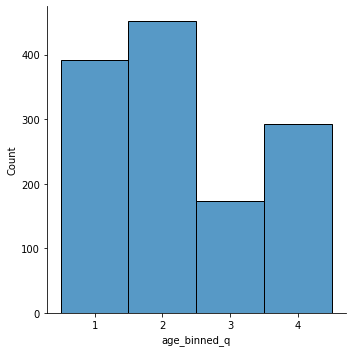

In [ ]:
sns.displot(df2['age_binned_q'])

In [ ]:
df2.groupby('age_binned_q').agg({
    'age' : ['min', 'max']
})

age      
                min   max
age_binned_q             
1              0.17  22.0
2             22.50  30.0
3             30.50  36.0
4             36.50  80.0

# Encoding

## One-Hot Encoding


### menggunakan pandas

In [ ]:
df_encoded = pd.get_dummies(df2['cabin'], prefix='cabin')
df_encoded

,cabin_A10,cabin_A11,cabin_A14,cabin_A16,cabin_A18,cabin_A19,cabin_A20,cabin_A21,cabin_A23,cabin_A24,cabin_A26,cabin_A29,cabin_A31,cabin_A32,cabin_A34,cabin_A36,cabin_A5,cabin_A6,cabin_A7,cabin_A9,cabin_B10,cabin_B101,cabin_B102,cabin_B11,cabin_B18,cabin_B19,cabin_B20,cabin_B22,cabin_B24,cabin_B26,cabin_B28,cabin_B3,cabin_B30,cabin_B35,cabin_B36,cabin_B37,cabin_B38,cabin_B39,cabin_B4,cabin_B41,...,cabin_D9,cabin_E10,cabin_E101,cabin_E12,cabin_E121,cabin_E17,cabin_E24,cabin_E25,cabin_E31,cabin_E33,cabin_E34,cabin_E36,cabin_E38,cabin_E39 E41,cabin_E40,cabin_E44,cabin_E45,cabin_E46,cabin_E49,cabin_E50,cabin_E52,cabin_E58,cabin_E60,cabin_E63,cabin_E67,cabin_E68,cabin_E77,cabin_E8,cabin_F,cabin_F E46,cabin_F E57,cabin_F E69,cabin_F G63,cabin_F G73,cabin_F2,cabin_F33,cabin_F38,cabin_F4,cabin_G6,cabin_T
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1305,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1306,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1307,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Mencari clue dari fitur lainnya

## Melihat *survival rate* penumpang dari fitur yang ada

In [ ]:
df2.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title,missing_indicator,fare_sqrt,fare_log,age_minmax,age_std,age_binned,age_binned2,age_binned_q
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss,False,14.537452,5.358177,0.361142,-0.043485,dewasa,25.0,2
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master,False,12.310565,5.027492,0.009395,-2.175570,anak-anak,5.0,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss,False,12.310565,5.027492,0.022924,-2.093567,anak-anak,5.0,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr,False,12.310565,5.027492,0.373669,0.032444,dewasa,25.0,2
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs,False,12.310565,5.027492,0.311036,-0.347201,dewasa,25.0,2


In [ ]:
df2[['pclass', 'survived']].groupby(['pclass'], as_index=False).mean().sort_values(by='survived', ascending=False)

,pclass,survived
0,1,0.619195
1,2,0.429603
2,3,0.255289


In [ ]:
df2[['sex', 'survived']].groupby(['sex'], as_index=False).mean().sort_values(by='survived', ascending=False)

,sex,survived
0,female,0.727468
1,male,0.190985


In [ ]:
df2[['sibsp', 'survived']].groupby(['sibsp'], as_index=False).mean().sort_values(by='survived', ascending=False)

,sibsp,survived
1,1,0.510972
2,2,0.452381
0,0,0.346801
3,3,0.300000
4,4,0.136364
5,5,0.000000
6,8,0.000000


In [ ]:
df2[['parch', 'survived']].groupby(['parch'], as_index=False).mean().sort_values(by='survived', ascending=False)

,parch,survived
3,3,0.625000
1,1,0.588235
2,2,0.504425
0,0,0.335329
4,4,0.166667
5,5,0.166667
6,6,0.000000
7,9,0.000000


In [ ]:
# Import tambahan library
import random as rnd
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


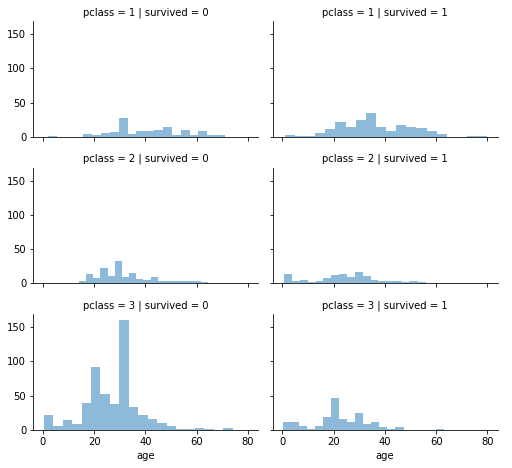

In [ ]:
# Melihat korelasi antara kelas penumpang dengan tingkat survival
grid = sns.FacetGrid(df2, col='survived', row='pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


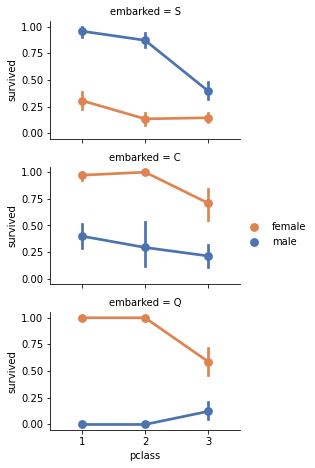

In [ ]:
grid = sns.FacetGrid(df2, row='embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette='deep')
grid.add_legend();

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


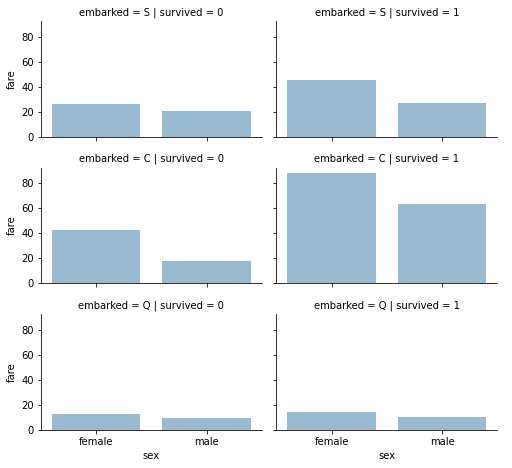

In [ ]:
grid = sns.FacetGrid(df2, col='survived', row='embarked', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'sex', 'fare', alpha=.5, ci=None)
grid.add_legend();

In [ ]:
df2.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title,missing_indicator,fare_sqrt,fare_log,age_minmax,age_std,age_binned,age_binned2,age_binned_q
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss,False,14.537452,5.358177,0.361142,-0.043485,dewasa,25.0,2
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master,False,12.310565,5.027492,0.009395,-2.175570,anak-anak,5.0,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss,False,12.310565,5.027492,0.022924,-2.093567,anak-anak,5.0,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr,False,12.310565,5.027492,0.373669,0.032444,dewasa,25.0,2
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs,False,12.310565,5.027492,0.311036,-0.347201,dewasa,25.0,2


## Merubah dan menghapus fitur

In [ ]:
df2.describe(include='all')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title,missing_indicator,fare_sqrt,fare_log,age_minmax,age_std,age_binned,age_binned2,age_binned_q
count,1309.000000,1309.000000,1309,1309,1309.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745,1309,1309,1308.000000,1308.000000,1309.000000,1.309000e+03,1309,1309.0,1309
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,27,NaN,369,5,2,NaN,NaN,NaN,NaN,4,8.0,4
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY",Mr,False,NaN,NaN,NaN,NaN,dewasa,25.0,2
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64,775,1046,NaN,NaN,NaN,NaN,825,588.0,452
mean,2.294882,0.381971,NaN,NaN,29.572704,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN,NaN,NaN,4.909667,2.979411,0.368316,-4.211628e-16,NaN,NaN,NaN
std,0.837836,0.486055,NaN,NaN,13.170206,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN,NaN,NaN,3.032768,0.968668,0.164978,1.000000e+00,NaN,NaN,NaN
min,1.000000,0.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,-2.232517e+00,NaN,NaN,NaN
25%,2.000000,0.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,2.809947,2.185579,0.273456,-5.749875e-01,NaN,NaN,NaN
50%,3.000000,0.000000,NaN,NaN,30.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN,NaN,NaN,3.801868,2.737881,0.373669,3.244411e-02,NaN,NaN,NaN
75%,3.000000,1.000000,NaN,NaN,36.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN,NaN,NaN,5.592406,3.474293,0.448829,4.880178e-01,NaN,NaN,NaN


In [ ]:
# Drop fitur
print('Sebelum', df2.shape)

df3 = df2.copy()
df3 = df3.drop(['ticket', 'cabin', 'boat', 'body', 'home.dest'], axis = 1)

'Sesudah', df3.shape

Sebelum (1309, 23)


('Sesudah', (1309, 18))

In [ ]:
df3.head()

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,Title,missing_indicator,fare_sqrt,fare_log,age_minmax,age_std,age_binned,age_binned2,age_binned_q
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,211.3375,S,Miss,False,14.537452,5.358177,0.361142,-0.043485,dewasa,25.0,2
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,151.5500,S,Master,False,12.310565,5.027492,0.009395,-2.175570,anak-anak,5.0,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,151.5500,S,Miss,False,12.310565,5.027492,0.022924,-2.093567,anak-anak,5.0,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,151.5500,S,Mr,False,12.310565,5.027492,0.373669,0.032444,dewasa,25.0,2
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,151.5500,S,Mrs,False,12.310565,5.027492,0.311036,-0.347201,dewasa,25.0,2


In [ ]:
# Merubah data kategorikal menjadi numerikal
# Data jenis kelamin
df3['sex'] = df3['sex'].map({ 'female': 0, 'male': 1}).astype(int)

In [ ]:
df3.head()

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,Title,missing_indicator,fare_sqrt,fare_log,age_minmax,age_std,age_binned,age_binned2,age_binned_q
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.00,0,0,211.3375,S,Miss,False,14.537452,5.358177,0.361142,-0.043485,dewasa,25.0,2
1,1,1,"Allison, Master. Hudson Trevor",1,0.92,1,2,151.5500,S,Master,False,12.310565,5.027492,0.009395,-2.175570,anak-anak,5.0,1
2,1,0,"Allison, Miss. Helen Loraine",0,2.00,1,2,151.5500,S,Miss,False,12.310565,5.027492,0.022924,-2.093567,anak-anak,5.0,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.00,1,2,151.5500,S,Mr,False,12.310565,5.027492,0.373669,0.032444,dewasa,25.0,2
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.00,1,2,151.5500,S,Mrs,False,12.310565,5.027492,0.311036,-0.347201,dewasa,25.0,2


In [ ]:
df3['Title'].value_counts()

Mr        775
Miss      265
Mrs       200
Master     61
Dr          8
Name: Title, dtype: int64

In [ ]:
# Merubah data title
df3['title'] = df3['Title'].map({ 'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Dr': 5}).astype(int)

In [ ]:
df3.head()

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,Title,missing_indicator,fare_sqrt,fare_log,age_minmax,age_std,age_binned,age_binned2,age_binned_q,title
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.00,0,0,211.3375,S,Miss,False,14.537452,5.358177,0.361142,-0.043485,dewasa,25.0,2,2
1,1,1,"Allison, Master. Hudson Trevor",1,0.92,1,2,151.5500,S,Master,False,12.310565,5.027492,0.009395,-2.175570,anak-anak,5.0,1,4
2,1,0,"Allison, Miss. Helen Loraine",0,2.00,1,2,151.5500,S,Miss,False,12.310565,5.027492,0.022924,-2.093567,anak-anak,5.0,1,2
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.00,1,2,151.5500,S,Mr,False,12.310565,5.027492,0.373669,0.032444,dewasa,25.0,2,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.00,1,2,151.5500,S,Mrs,False,12.310565,5.027492,0.311036,-0.347201,dewasa,25.0,2,3


In [ ]:
df3['age_binned'].value_counts()

dewasa       825
orang tua    228
remaja       154
anak-anak    102
Name: age_binned, dtype: int64

In [ ]:
df3['age'] = df3['age_binned'].map({ 'anak-anak': 0, 'remaja': 1, 'dewasa': 2, 'orang tua': 3}).astype(int)

In [ ]:
df3.head()

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,Title,missing_indicator,fare_sqrt,fare_log,age_minmax,age_std,age_binned,age_binned2,age_binned_q,title
0,1,1,"Allen, Miss. Elisabeth Walton",0,2,0,0,211.3375,S,Miss,False,14.537452,5.358177,0.361142,-0.043485,dewasa,25.0,2,2
1,1,1,"Allison, Master. Hudson Trevor",1,0,1,2,151.5500,S,Master,False,12.310565,5.027492,0.009395,-2.175570,anak-anak,5.0,1,4
2,1,0,"Allison, Miss. Helen Loraine",0,0,1,2,151.5500,S,Miss,False,12.310565,5.027492,0.022924,-2.093567,anak-anak,5.0,1,2
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,2,1,2,151.5500,S,Mr,False,12.310565,5.027492,0.373669,0.032444,dewasa,25.0,2,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,2,1,2,151.5500,S,Mrs,False,12.310565,5.027492,0.311036,-0.347201,dewasa,25.0,2,3


In [ ]:
df3['jumlahkeluarga'] = df3['sibsp'] + df3['parch'] + 1

In [ ]:
df3.head()

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,Title,missing_indicator,fare_sqrt,fare_log,age_minmax,age_std,age_binned,age_binned2,age_binned_q,title,jumlahkeluarga
0,1,1,"Allen, Miss. Elisabeth Walton",0,2,0,0,211.3375,S,Miss,False,14.537452,5.358177,0.361142,-0.043485,dewasa,25.0,2,2,1
1,1,1,"Allison, Master. Hudson Trevor",1,0,1,2,151.5500,S,Master,False,12.310565,5.027492,0.009395,-2.175570,anak-anak,5.0,1,4,4
2,1,0,"Allison, Miss. Helen Loraine",0,0,1,2,151.5500,S,Miss,False,12.310565,5.027492,0.022924,-2.093567,anak-anak,5.0,1,2,4
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,2,1,2,151.5500,S,Mr,False,12.310565,5.027492,0.373669,0.032444,dewasa,25.0,2,1,4
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,2,1,2,151.5500,S,Mrs,False,12.310565,5.027492,0.311036,-0.347201,dewasa,25.0,2,3,4


In [ ]:
df3[['jumlahkeluarga', 'survived']].groupby(['jumlahkeluarga'], as_index=False).mean().sort_values(by='survived', ascending=False)

,jumlahkeluarga,survived
3,4,0.697674
2,3,0.566038
1,2,0.536170
0,1,0.302532
4,5,0.272727
6,7,0.250000
5,6,0.200000
7,8,0.000000
8,11,0.000000


In [ ]:
df3['sendirian'] = 0
df3.loc[df3['jumlahkeluarga'] == 1, 'sendirian'] = 1

In [ ]:
df3.head()

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,Title,missing_indicator,fare_sqrt,fare_log,age_minmax,age_std,age_binned,age_binned2,age_binned_q,title,jumlahkeluarga,sendirian
0,1,1,"Allen, Miss. Elisabeth Walton",0,2,0,0,211.3375,S,Miss,False,14.537452,5.358177,0.361142,-0.043485,dewasa,25.0,2,2,1,1
1,1,1,"Allison, Master. Hudson Trevor",1,0,1,2,151.5500,S,Master,False,12.310565,5.027492,0.009395,-2.175570,anak-anak,5.0,1,4,4,0
2,1,0,"Allison, Miss. Helen Loraine",0,0,1,2,151.5500,S,Miss,False,12.310565,5.027492,0.022924,-2.093567,anak-anak,5.0,1,2,4,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,2,1,2,151.5500,S,Mr,False,12.310565,5.027492,0.373669,0.032444,dewasa,25.0,2,1,4,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,2,1,2,151.5500,S,Mrs,False,12.310565,5.027492,0.311036,-0.347201,dewasa,25.0,2,3,4,0


In [ ]:
df3[['sendirian', 'survived']].groupby(['sendirian'], as_index=False).mean().sort_values(by='survived', ascending=False)

,sendirian,survived
0,0,0.502890
1,1,0.302532


In [ ]:
# Hapus fitur yang sudah tidak digunakan
df3 = df3.drop(['sibsp', 'parch', 'Title', 'age_binned', 'age_binned2', 'age_binned_q'], axis=1)

In [ ]:
df3.head()

,pclass,survived,name,sex,age,fare,embarked,missing_indicator,fare_sqrt,fare_log,age_minmax,age_std,title,jumlahkeluarga,sendirian
0,1,1,"Allen, Miss. Elisabeth Walton",0,2,211.3375,S,False,14.537452,5.358177,0.361142,-0.043485,2,1,1
1,1,1,"Allison, Master. Hudson Trevor",1,0,151.5500,S,False,12.310565,5.027492,0.009395,-2.175570,4,4,0
2,1,0,"Allison, Miss. Helen Loraine",0,0,151.5500,S,False,12.310565,5.027492,0.022924,-2.093567,2,4,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,2,151.5500,S,False,12.310565,5.027492,0.373669,0.032444,1,4,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,2,151.5500,S,False,12.310565,5.027492,0.311036,-0.347201,3,4,0


In [ ]:
df3['embarked'].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [ ]:
df3['embarked'].describe()

count     1307
unique       3
top          S
freq       914
Name: embarked, dtype: object

In [ ]:
frekuensiembarked = df3['embarked'].dropna().mode()[0]
frekuensiembarked

'S'

In [ ]:
df3['embarked'] = df3['embarked'].fillna(frekuensiembarked)

In [ ]:
df3['embarked'].describe()

count     1309
unique       3
top          S
freq       916
Name: embarked, dtype: object

In [ ]:
# Merubah data kategorikal menjadi numerikal untuk fitur embarked
df3['embarked'] = df3['embarked'].map({ 'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [ ]:
df3.head()

,pclass,survived,name,sex,age,fare,embarked,missing_indicator,fare_sqrt,fare_log,age_minmax,age_std,title,jumlahkeluarga,sendirian
0,1,1,"Allen, Miss. Elisabeth Walton",0,2,211.3375,0,False,14.537452,5.358177,0.361142,-0.043485,2,1,1
1,1,1,"Allison, Master. Hudson Trevor",1,0,151.5500,0,False,12.310565,5.027492,0.009395,-2.175570,4,4,0
2,1,0,"Allison, Miss. Helen Loraine",0,0,151.5500,0,False,12.310565,5.027492,0.022924,-2.093567,2,4,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,2,151.5500,0,False,12.310565,5.027492,0.373669,0.032444,1,4,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,2,151.5500,0,False,12.310565,5.027492,0.311036,-0.347201,3,4,0


In [ ]:
df3 = df3.drop(['name'], axis = 1)

In [ ]:
df3.head()

,pclass,survived,sex,age,fare,embarked,missing_indicator,fare_sqrt,fare_log,age_minmax,age_std,title,jumlahkeluarga,sendirian
0,1,1,0,2,211.3375,0,False,14.537452,5.358177,0.361142,-0.043485,2,1,1
1,1,1,1,0,151.5500,0,False,12.310565,5.027492,0.009395,-2.175570,4,4,0
2,1,0,0,0,151.5500,0,False,12.310565,5.027492,0.022924,-2.093567,2,4,0
3,1,0,1,2,151.5500,0,False,12.310565,5.027492,0.373669,0.032444,1,4,0
4,1,0,0,2,151.5500,0,False,12.310565,5.027492,0.311036,-0.347201,3,4,0


In [ ]:
df3['fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

In [ ]:
df3['fare'].fillna(df3['fare'].dropna().median(), inplace=True)

In [ ]:
df3['fare'].describe()

count    1309.000000
mean       33.281086
std        51.741500
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

In [ ]:
df3['rentangharga'] = pd.qcut(df3['fare'], 4)
df3[['rentangharga', 'survived']].groupby(['rentangharga'], as_index=False).mean().sort_values(by='rentangharga', ascending=True)

,rentangharga,survived
0,"(-0.001, 7.896]",0.228487
1,"(7.896, 14.454]",0.283489
2,"(14.454, 31.275]",0.435976
3,"(31.275, 512.329]",0.585139


In [ ]:
df3.loc[df3['fare'] <= 7.896, 'fare'] = 0
df3.loc[(df3['fare'] > 7.896) & (df3['fare'] <= 14.454), 'fare'] = 1
df3.loc[(df3['fare'] > 14.454) & (df3['fare'] <= 31.275), 'fare'] = 2
df3.loc[df3['fare'] > 31.275, 'fare'] = 3
df3['fare'] = df3['fare'].astype(int)

In [ ]:
df3.head()

,pclass,survived,sex,age,fare,embarked,missing_indicator,fare_sqrt,fare_log,age_minmax,age_std,title,jumlahkeluarga,sendirian,rentangharga
0,1,1,0,2,3,0,False,14.537452,5.358177,0.361142,-0.043485,2,1,1,"(31.275, 512.329]"
1,1,1,1,0,3,0,False,12.310565,5.027492,0.009395,-2.175570,4,4,0,"(31.275, 512.329]"
2,1,0,0,0,3,0,False,12.310565,5.027492,0.022924,-2.093567,2,4,0,"(31.275, 512.329]"
3,1,0,1,2,3,0,False,12.310565,5.027492,0.373669,0.032444,1,4,0,"(31.275, 512.329]"
4,1,0,0,2,3,0,False,12.310565,5.027492,0.311036,-0.347201,3,4,0,"(31.275, 512.329]"


In [ ]:
df3 = df3.drop(['missing_indicator', 'fare_sqrt', 'fare_log', 'age_minmax', 'age_std', 'jumlahkeluarga', 'rentangharga'], axis=1)

In [ ]:
df3.head()

,pclass,survived,sex,age,fare,embarked,title,sendirian
0,1,1,0,2,3,0,2,1
1,1,1,1,0,3,0,4,0
2,1,0,0,0,3,0,2,0
3,1,0,1,2,3,0,1,0
4,1,0,0,2,3,0,3,0


In [ ]:
df3['usiakelas'] = df3['pclass'] * df3['age']

In [ ]:
df3.head()

,pclass,survived,sex,age,fare,embarked,title,sendirian,usiakelas
0,1,1,0,2,3,0,2,1,2
1,1,1,1,0,3,0,4,0,0
2,1,0,0,0,3,0,2,0,0
3,1,0,1,2,3,0,1,0,2
4,1,0,0,2,3,0,3,0,2
